In [63]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [64]:
adult_df=pd.read_csv(r'C:\Users\lenovo\Downloads\adult_data.csv',header=None,delimiter=' *, *')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
adult_df.shape

(32561, 15)

In [66]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
adult_df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Pre processing the data 

In [69]:
#create a copy of the dataframe 
adult_df_rev= pd.DataFrame.copy(adult_df)

In [70]:
adult_df_rev.duplicated().sum()

24

In [71]:
adult_df_rev.drop_duplicates(inplace=True)
adult_df_rev.shape

(32537, 15)

In [72]:
adult_df_rev.drop(['education','fnlwgt'],axis=1,inplace=True)
adult_df_rev.shape

(32537, 13)

In [73]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [74]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [75]:
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [76]:
adult_df_rev.replace('?', np.nan,inplace=True)

In [77]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [78]:
# na is not a missing value but python read it as missing value only nan is a missing value  , so remamber to replace it 
# if there is missing data in y we should not fill it we should drop it , because it will be no more 

In [79]:
#real word senis. of missing values 
# 1 detect the missing values 
# 2 seek helps from the client --- real values 
# 3 Ffill, Bfill,KNNImputer , measure of ct ( mean,median , mode )

In [80]:
# relace the missing values with the mode values 
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [82]:
#will detect the dtype os each variable at a run time and fill the varb with the respective  CT leading to imputations at once
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

### converting categorical data  to numerical`
##### dummy variables using pd.grt_dummies()

In [84]:
adult_df_rev_new=pd.get_dummies(adult_df_rev,drop_first=True)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,13,2174,0,40,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,50,13,0,0,13,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,38,9,0,0,40,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,53,7,0,0,40,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,28,13,0,0,40,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,Fals

In [85]:
adult_df_rev_new.shape

(32537, 82)

In [86]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [87]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])

# to see which lable is aasing to each variable 
"""
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
"""

"\n    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))\n    print('Feature', x)\n    print('mapping', le_name_mapping)\n"

In [88]:
adult_df_rev.head()
#0--- <=50k
#1--- >=50k

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [89]:
# when we have to give the dataset back to client we have to change the transforn to to original values so tthe we can do this 
data={"Gender":["Female", "Male","Female", "Others"] }
df=pd.DataFrame(data)
df.head()

le_gender=LabelEncoder()
df["Gender"]=le_gender.fit_transform(df["Gender"])
df.head()

df["Gender"]=le_gender.inverse_transform(df["Gender"])
df.head()

,Gender
0,Female
1,Male
2,Female
3,Others


In [90]:
X= adult_df_rev.values[:,0:-1]  #---.0 to 2 
Y=adult_df_rev.values[:,-1]
# values will return an array whereas  .iloc will return a df object 
#arrays are lighter in weight which indirectly help the model to build faster 

# X= adult_df_rev.drop('income', axis=1)
#Y= adult_df_rev['incom']

In [91]:
print(X.shape)
print(Y.shape)

(32537, 12)
(32537,)


### scaling  

In [93]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [94]:
print(X)

[[ 0.03038995  2.62344898  1.13477712 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053  1.13477712 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638 -0.42067868 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]]


In [95]:
Y=Y.astype(int)

### Running a basic model 

In [97]:
from sklearn.model_selection import train_test_split

#split the data into the test and train 
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,
                                                  random_state=10)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#print('precentage of the train data',X_train.shape[0]/X.shape[0]*100)

(22775, 12)
(9762, 12)
(22775,)
(9762,)


In [99]:
from sklearn.linear_model import LogisticRegression 

classifier= LogisticRegression(random_state=10)
classifier.fit(X_train,Y_train)
print(classifier.intercept_)
print(classifier.coef_)

[-1.49802679]
[[ 0.45145685 -0.09587962  0.83197795 -0.34753639 -0.02121689 -0.20142368
   0.10508288  0.42713191  2.32375976  0.2812546   0.36250472  0.00850201]]


In [100]:
classifier.score(X_train,Y_train)

0.8229637760702525

In [101]:
print(list(zip(adult_df_rev.columns[0:-1], classifier.coef_.ravel())))

[('age', 0.4514568531797458), ('workclass', -0.09587962330824412), ('education_num', 0.8319779468958556), ('marital_status', -0.3475363868430262), ('occupation', -0.02121688679963131), ('relationship', -0.20142368011586909), ('race', 0.10508288288944592), ('sex', 0.4271319086868492), ('capital_gain', 2.3237597574470175), ('capital_loss', 0.281254602489021), ('hours_per_week', 0.362504719806485), ('native_country', 0.008502014660138602)]


In [102]:
Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [103]:
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.89036452, 0.10963548],
       [0.98759992, 0.01240008],
       [0.98077534, 0.01922466],
       ...,
       [0.87472256, 0.12527744],
       [0.97246791, 0.02753209],
       [0.87432678, 0.12567322]])

In [104]:
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0),

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7012  384]
 [1296 1070]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8279041180086048


### Tuning 

#### Adustment of threshold

In [108]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.89036452 0.10963548]
 [0.98759992 0.01240008]
 [0.98077534 0.01922466]
 ...
 [0.87472256 0.12527744]
 [0.97246791 0.02753209]
 [0.87432678 0.12567322]]


In [109]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:    # ideal range 0.4 to 0.6
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[6895  501]
 [1147 1219]]
Accuracy of the model:  0.8311821348084409
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7396
           1       0.71      0.52      0.60      2366

    accuracy                           0.83      9762
   macro avg       0.78      0.72      0.74      9762
weighted avg       0.82      0.83      0.82      9762



In [111]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])
#the best threhold is where there is less effect on error & dec in error 1

Errors at threshold  0.4 : 1672  , type 2 error : 1022  , type 1 error: 650
Errors at threshold  0.41000000000000003 : 1657  , type 2 error : 1047  , type 1 error: 610
Errors at threshold  0.42000000000000004 : 1665  , type 2 error : 1077  , type 1 error: 588
Errors at threshold  0.43000000000000005 : 1662  , type 2 error : 1103  , type 1 error: 559
Errors at threshold  0.44000000000000006 : 1652  , type 2 error : 1127  , type 1 error: 525
Errors at threshold  0.45000000000000007 : 1648  , type 2 error : 1147  , type 1 error: 501
Errors at threshold  0.4600000000000001 : 1642  , type 2 error : 1174  , type 1 error: 468
Errors at threshold  0.4700000000000001 : 1649  , type 2 error : 1202  , type 1 error: 447
Errors at threshold  0.4800000000000001 : 1668  , type 2 error : 1241  , type 1 error: 427
Errors at threshold  0.4900000000000001 : 1667  , type 2 error : 1265  , type 1 error: 402
Errors at threshold  0.5000000000000001 : 1680  , type 2 error : 1296  , type 1 error: 384
Errors at

In [112]:
''' when there is  4 , 5 threshold so then use auc-- area under the curve 
# auc 0.5--- worst model 
# auc 0.5 to 0.6-- poor
0.7 to 0.8 --- good
0.8 to 0.9 --- v.good 
0.9 to 1 --- excellent
'''

' when there is  4 , 5 threshold so then use auc-- area under the curve \n# auc 0.5--- worst model \n# auc 0.5 to 0.6-- poor\n0.7 to 0.8 --- good\n0.8 to 0.9 --- v.good \n0.9 to 1 --- excellent\n'

In [113]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
 
print(auc)

0.8613948870948497


Text(0, 0.5, 'True Positive Rate')

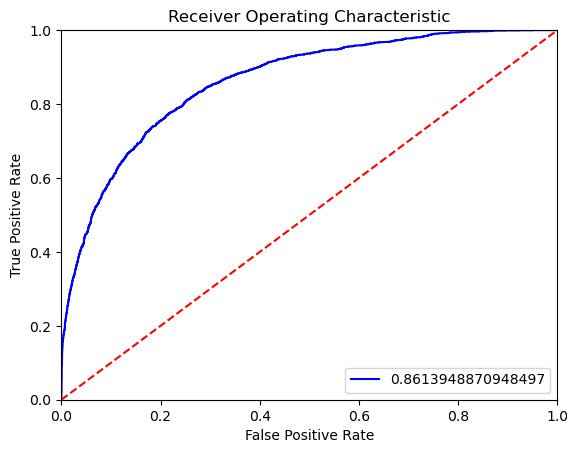

In [114]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [115]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
 
print(auc)
print(fpr)
print(tpr)

0.723738117563262
[0.         0.06773932 1.        ]
[0.         0.51521555 1.        ]


Text(0, 0.5, 'True Positive Rate')

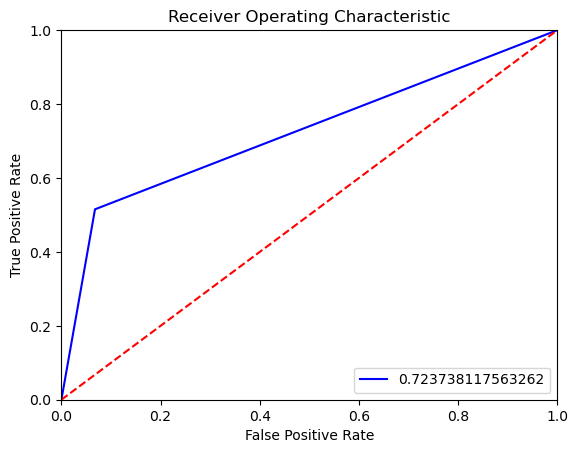

In [116]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC:
1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an highest AUC closest to the overall AUC.

### adult test

In [119]:
adult_test=pd.read_csv(r'C:\Users\lenovo\Downloads\adult_test.csv',header=None,delimiter=' *, *')
adult_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [120]:
adult_test.shape

(16281, 15)

In [121]:
adult_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [122]:
adult_test.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,16281.000000,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,NaN,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,38.767459,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,13.849187,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [123]:
adult_test_rev= pd .DataFrame.copy(adult_test)

In [124]:
adult_test_rev.duplicated().sum()

5

In [125]:
adult_test_rev.drop_duplicates(inplace=True)
adult_test_rev.shape

(16276, 15)

In [126]:
adult_test_rev.drop(['education','fnlwgt'],axis=1,inplace=True)
adult_test_rev.shape

(16276, 13)

In [127]:
adult_test_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [128]:
adult_test_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [129]:
adult_test_rev.replace('?',np.nan,inplace=True)

In [130]:
adult_test_rev.isnull().sum()

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [131]:
for value in ['workclass','occupation','native_country']:
    adult_test_rev[value].fillna(adult_test_rev[value].mode()[0],inplace=True)

In [132]:
adult_test_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [133]:
colname=[]
for x in adult_test_rev.columns:
    if adult_test_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [218]:
adult_test_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,7,4,6,3,2,1,0,0,40,37,0
1,38,3,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,3,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,10,4,9,3,4,0,0,0,30,37,0


In [197]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

for x in colname:
    adult_test_rev[x]=le.fit_transform(adult_test_rev[x])

adult_test_rev.head()


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,7,4,6,3,2,1,0,0,40,37,0
1,38,3,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,3,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,10,4,9,3,4,0,0,0,30,37,0


In [199]:
X_test_new = adult_test_rev.drop('income',axis=1)
Y_test_new = adult_test_rev['income']

In [202]:
print(X_test_new.shape)
print(Y_test_new.shape)

(16276, 12)
(16276,)


<Axes: >

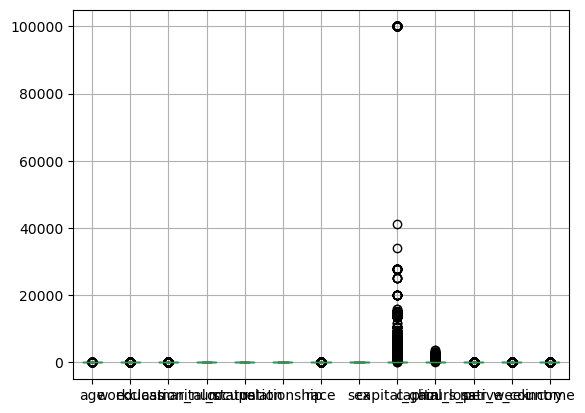

In [204]:
adult_test_rev.boxplot()

In [206]:
X_test_new= scaler.transform(X_test_new)

In [208]:
print(X_test_new)

[[-0.99617055 -0.08527638 -1.19840658 ... -0.21674317 -0.03566374
   0.09594355]
 [-0.0429358  -0.08527638 -0.42067868 ... -0.21674317  0.77426932
   0.09594355]
 [-0.7761933  -1.89109329  0.74591317 ... -0.21674317 -0.03566374
   0.09594355]
 ...
 [-0.0429358  -0.08527638  1.13477712 ... -0.21674317  0.77426932
   0.09594355]
 [ 0.3970187  -0.08527638  1.13477712 ... -0.21674317 -0.03566374
   0.09594355]
 [-0.26291305  0.81763207  1.13477712 ... -0.21674317  1.58420237
   0.09594355]]


In [210]:
y_pred_proba = classifier.predict_proba(X_test_new)

In [212]:
y_pred_proba

array([[0.97744965, 0.02255035],
       [0.78624792, 0.21375208],
       [0.6932622 , 0.3067378 ],
       ...,
       [0.50876185, 0.49123815],
       [0.20621755, 0.79378245],
       [0.47384552, 0.52615448]])

In [214]:
Y_pred_new=[]
for value in y_pred_proba[:,1]:
    if value > 0.45:    # ideal range 0.4 to 0.6
        Y_pred_new.append(1)
    else:
        Y_pred_new.append(0)
#print(y_pred_class)

In [216]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test_new,Y_pred_new)
print(cfm)
acc=accuracy_score(Y_test_new, Y_pred_new)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test_new, Y_pred_new))

[[11493   937]
 [ 1941  1905]]
Accuracy of the model:  0.823175227328582
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12430
           1       0.67      0.50      0.57      3846

    accuracy                           0.82     16276
   macro avg       0.76      0.71      0.73     16276
weighted avg       0.81      0.82      0.81     16276

